In [72]:
import requests
import pandas as pd
import numpy as np
import json
import seaborn as sb
import urllib


In [89]:
YELP_API_KEY = "FTO1dYUQS-_-jU_kJCMLOOWR8CisVMNmsEXHKaxBAC7J7KwrG_t-hJbIUP5G0q1h_fbpBcJ6GCFHcku8tcOgB6SOQbeX0OI1yTyy9w3S73dQYcw5m8YexC3bR4rHW3Yx"
YELP_CLIENT_ID = "JsQmUayFPFfxWJj9Grt2aw"
def yelp_search(term,location):
    headers = {"Authorization": "Bearer " + YELP_API_KEY}
    payload = {'term': term, 'location': location}
    params = urllib.parse.urlencode(payload) #encodes the data
    r = requests.get('https://api.yelp.com/v3/businesses/search', headers=headers, params=params)
    results = r.json()
    try:    
        yelp_id = results["businesses"][0]["id"]
        yelp_price = results["businesses"][0]["price"]
        yelp_rating = results["businesses"][0]["rating"]
        yelp_review_count = results["businesses"][0]["review_count"]
        yelp_transaction_type = results["businesses"][0]["transactions"]
        yelp_name = results["businesses"][0]["name"]
        yelp_latitude = results["businesses"][0]["coordinates"]["latitude"]
        yelp_longitude = results["businesses"][0]["coordinates"]["longitude"]
        if yelp_transaction_type == []:
            yelp_transaction_type = "N/A"
    except:
        print("Yelp search unavailable!")
        yelp_id = None
        yelp_price = None
        yelp_rating = None
        yelp_review_count = None
        yelp_transaction_type = None
        yelp_name = None
        yelp_latitude = None
        yelp_longitude = None
    return (yelp_id, yelp_price, yelp_rating, yelp_review_count, yelp_transaction_type,yelp_name,yelp_latitude,yelp_longitude)

In [75]:
yelp_id = "V7lXZKBDzScDeGB8JmnzSA"
def yelp_details(yelp_id):
    headers = {"Authorization": "Bearer " + YELP_API_KEY}
    r = requests.get('https://api.yelp.com/v3/businesses/'+yelp_id, headers=headers,)
    results = r.json()
    try:
        yelp_claimed = results["is_claimed"]
        try:
            yelp_hours = results["hours"]
        except: 
            print("Yelp hours unavailable!")
            yelp_hours = None
    except:
        print("Yelp details unavailable!")
        yelp_claimed = None
        yelp_hours = None
    return (yelp_claimed, yelp_hours)

In [5]:
#Imports the data and loads it into a dataframe

page_one = requests.get('https://data.cityofnewyork.us/resource/9w7m-hzhe.json?$limit=50000').json()
df = pd.DataFrame(page_one)

for i in range(1,8):
    next_page = requests.get('https://data.cityofnewyork.us/resource/9w7m-hzhe.json?$limit=50000&$offset=' + str(int(i*5))+ '0000').json()
    df2 = pd.DataFrame(next_page)
    df = df.append(df2)

df.drop_duplicates()
df.to_csv("raw_data.csv",index=False)

,action,boro,building,camis,critical_flag,cuisine_description,dba,grade,grade_date,inspection_date,inspection_type,phone,record_date,score,street,violation_code,violation_description,zipcode
0,Violations were cited in the following area(s).,QUEENS,13204,50039146,Not Critical,Caribbean,BROWN BETTY RESTAURANT,A,2016-09-02T00:00:00.000,2016-09-02T00:00:00.000,Cycle Inspection / Initial Inspection,7183236438,2018-11-03T06:01:38.000,4,LIBERTY AVE,09C,Food contact surface not properly maintained.,11419
1,Violations were cited in the following area(s).,BROOKLYN,8814,50072006,Critical,Pizza/Italian,PATSY'S PIZZERIA OF BAY RIDGE,NaN,NaN,2018-01-11T00:00:00.000,Pre-permit (Operational) / Initial Inspection,7187453003,2018-11-03T06:01:38.000,34,3RD AVE,02G,Cold food item held above 41Âº F (smoked fish ...,11209
2,Violations were cited in the following area(s).,MANHATTAN,10,50012118,Critical,Japanese,NORIKOH,A,2015-10-13T00:00:00.000,2015-10-13T00:00:00.000,Cycle Inspection / Re-inspection,6469186778,2018-11-03T06:01:38.000,10,E 39TH ST,06A,Personal cleanliness inadequate. Outer garment...,10016
3,Violations were cited in the following area(s).,QUEENS,12432A,50070589,Not Critical,Thai,OCHA THAI CUISINE,NaN,NaN,2018-04-18T00:00:00.000,Cycle Inspection / Initial Inspection,7182610008,2018-11-03T06:01:38.000,7,QUEENS BLVD,10F,Non-food contact surface improperly constructe...,11415
4,Violations were cited in the following area(s).,BROOKLYN,592,50071826,Critical,Soul Food,BLACK NILE SEAFOOD & SOUL FOOD,A,2018-10-18T00:00:00.000,2018-10-18T00:00:00.000,Cycle Inspection / Initial Inspection,3478798911,2018-11-03T06:01:38.000,12,NOSTRAND AVE,04N,Filth flies or food/refuse/sewage-associated (...,11216
5,Violations were cited in the following area(s).,MANHATTAN,2755,50004346,Critical,American,KFC,Z,2018-09-04T00:00:00.000,2018-09-04T00:00:00.000,Cycle Inspection / Re-inspection,2126659430,2018-11-03T06:01:38.000,52,BROADWAY,05D,Hand washing facility not provided in or near ...,10025
6,Violations were cited in the following area(s).,QUEENS,14932,50033122,Critical,Korean,PARTY WELL RESTAURANT & ORIENTAL BAKERY,B,2017-04-19T00:00:00.000,2017-04-19T00:00:00.000,Cycle Inspection / Re-inspection,7188860800,2018-11-03T06:01:38.000,27,41ST AVE,06E,"Sanitized equipment or utensil, including in-u...",11355
7,Violations were cited in the following area(s).,BRONX,3827,50060018,Critical,Caribbean,SEA JAMMINS CARIBBEAN CUISINE,NaN,NaN,2018-01-09T00:00:00.000,Cycle Inspection / Initial Inspection,7189943875,2018-11-03T06:01:38.000,17,BRONXWOOD AVE,04L,Evidence of mice or live mice present in facil...,10469
8,Violations were cited in the following area(s).,QUEENS,6910,41441583,Not Critical,Filipino,FRITZIES BAKE SHOP,A,2017-01-24T00:00:00.000,2017-01-24T00:00:00.000,Cycle Inspection / Re-inspection,7185070205,2018-11-03T06:01:38.000,11,ROOSEVELT AVENUE,10F,Non-food contact surface improperly constructe...,11377
9,Violations were cited in the following area(s).,BROOKLYN,1319,50000510,Not Critical,Jewish/Kosher,JERUSALEM STEAKHOUSE,NaN,NaN,2016-04-18T00:00:00.000,Cycle Inspection / Initial Inspection,7182588899,2018-11-03T06:01:38.000,23,AVENUE J,10F,Non-food contact surface improperly constructe...,11230


In [39]:
df_restaurant = df.drop_duplicates("camis")
df_restaurant = df_restaurant[["dba","street","zipcode"]]
df_restaurant["searched"] = False
df_restaurant.to_csv("restaurants_raw_data.csv",index=False)
print(df_restaurant)

                                            dba               street zipcode  \
0                        BROWN BETTY RESTAURANT          LIBERTY AVE   11419   
1                 PATSY'S PIZZERIA OF BAY RIDGE              3RD AVE   11209   
2                                       NORIKOH            E 39TH ST   10016   
3                             OCHA THAI CUISINE          QUEENS BLVD   11415   
4                BLACK NILE SEAFOOD & SOUL FOOD         NOSTRAND AVE   11216   
5                                           KFC             BROADWAY   10025   
6       PARTY WELL RESTAURANT & ORIENTAL BAKERY             41ST AVE   11355   
7                 SEA JAMMINS CARIBBEAN CUISINE        BRONXWOOD AVE   10469   
8                            FRITZIES BAKE SHOP     ROOSEVELT AVENUE   11377   
9                          JERUSALEM STEAKHOUSE             AVENUE J   11230   
10                               MARIA PIZZERIA  FT HAMILTON PARKWAY   11228   
11                     EL PENACHO II RES

In [95]:
df_restaurant

,dba,street,zipcode,searched,yelp_id,yelp_price,yelp_rating,yelp_review_count,yelp_transaction_type,yelp_is_claimed,yelp_hours,yelp_latitude,yelp_longitude,yelp_name
0,BROWN BETTY RESTAURANT,LIBERTY AVE,11419.0,False,UL5-lsRTZWDe7ywNkEaCjQ,$$,3.0,11.0,N;/;A,True,NaN,40.690525,-73.813790,Brown Betty
1,PATSY'S PIZZERIA OF BAY RIDGE,3RD AVE,11209.0,False,sNu05k9J8ILFeBzLM7LCIQ,$$,3.5,74.0,pickup;delivery,True,"[{'open': [{'is_overnight': False, 'start': '1...",40.621732,-74.031993,Patsy's Pizzeria - Bay Ridge
2,NORIKOH,E 39TH ST,10016.0,False,xFp3xSQ43J-i7nmJfNBsZA,$$,4.0,424.0,delivery;pickup;restaurant_reservation,True,"[{'open': [{'is_overnight': False, 'start': '1...",40.751160,-73.981530,Norikoh
3,OCHA THAI CUISINE,QUEENS BLVD,11415.0,False,SOrQnn_dsHIFpmW5HTCFCw,$,3.0,38.0,pickup;delivery,True,"[{'open': [{'is_overnight': False, 'start': '1...",40.712604,-73.827350,Ocha Thai Cuisine
4,BLACK NILE SEAFOOD & SOUL FOOD,NOSTRAND AVE,11216.0,False,IPh4H0AfWk5LVplgYV9OGQ,$$,4.5,78.0,pickup;delivery,True,"[{'open': [{'is_overnight': False, 'start': '1...",40.678230,-73.949980,Black Nile
5,KFC,BROADWAY,10025.0,False,mzO7pED68L5qfwm55R_tQQ,$,2.5,12.0,delivery,True,"[{'open': [{'is_overnight': False, 'start': '1...",40.801200,-73.968200,KFC
6,PARTY WELL RESTAURANT & ORIENTAL BAKERY,41ST AVE,11355.0,False,mnj9O1tbCKiAN5zWMe5v8w,$$,4.0,1182.0,N;/;A,False,"[{'open': [{'is_overnight': False, 'start': '1...",40.764890,-73.810620,Picnic Garden
7,SEA JAMMINS CARIBBEAN CUISINE,BRONXWOOD AVE,10469.0,False,KBW0EP-prQBhkqqGJCxmXg,$$,4.0,659.0,N;/;A,True,"[{'open': [{'is_overnight': False, 'start': '1...",40.677052,-73.963417,The Islands
8,FRITZIES BAKE SHOP,ROOSEVELT AVENUE,11377.0,False,y1JJ1DIlZmCarpyT9ysYPw,$,3.0,28.0,N;/;A,True,"[{'open': [{'is_overnight': False, 'start': '0...",40.746140,-73.895780,Fritzie's Bake Shop
9,JERUSALEM STEAKHOUSE,AVENUE J,11230.0,False,Vv5wcG5f0qAqkg7FkgjzAQ,$$,4.0,18.0,N;/;A,False,NaN,40.625297,-73.962580,Jerusalem Steak House II


In [112]:
df_restaurant = pd.read_csv("restaurants_raw_data.csv")
count =1
df_restaurant = df_restaurant.sort_values(by=['searched'],ascending = True)

for restau in df_restaurant.index[0:2550]:
    df_restaurant = pd.read_csv("restaurants_raw_data.csv")
    if df_restaurant.loc[restau,"searched"] == False:
        search_results = yelp_search(df_restaurant.loc[restau,"dba"],df_restaurant.loc[restau,"street"] + " NY " + str(df_restaurant.loc[restau,"zipcode"]))
        df_restaurant.loc[restau,"yelp_id"] = search_results[0]
        df_restaurant.loc[restau,"yelp_price"] = search_results[1]
        df_restaurant.loc[restau,"yelp_rating"] = search_results[2]
        df_restaurant.loc[restau,"yelp_review_count"] = search_results[3]
        if type(search_results[4]) == list:
            df_restaurant.loc[restau,"yelp_transaction_type"] = ';'.join(str(e) for e in search_results[4])
        df_restaurant.loc[restau,"yelp_latitude"] = search_results[6]
        df_restaurant.loc[restau,"yelp_longitude"] = search_results[7]
        df_restaurant.loc[restau,"yelp_name"] = search_results[5]
        if type(df_restaurant.loc[restau,"yelp_id"]) == str:
            details_results = yelp_details(df_restaurant.loc[restau,"yelp_id"])
        df_restaurant.loc[restau,"yelp_is_claimed"] = details_results[0]
        df_restaurant.loc[restau,"yelp_hours"] = details_results[1]
        df_restaurant.loc[restau,"searched"] = True
        print(count,search_results[5])
        count = count +1    
        df_restaurant.to_csv("restaurants_raw_data.csv",index=False)

1 La Dinastia
2 Tang Pavilion
3 Northern Territory
4 Juice Press
Yelp hours unavailable!
5 Sam Lee Kitchen
Yelp hours unavailable!
6 Hector's Cafe-Restaurant
7 Kings' Carriage House
8 Shanghai Zhen Gong Fu 上海真功夫
Yelp details unavailable!
9 Jimmy Ryan's
Yelp search unavailable!
10 None
Yelp search unavailable!
11 None
Yelp search unavailable!
12 None
Yelp search unavailable!
13 None
Yelp search unavailable!
14 None
Yelp search unavailable!
15 None
Yelp search unavailable!
16 None
Yelp search unavailable!
17 None
Yelp search unavailable!
18 None
Yelp search unavailable!
19 None
Yelp search unavailable!
20 None
Yelp search unavailable!
21 None
Yelp search unavailable!
22 None
Yelp search unavailable!
23 None
Yelp search unavailable!
24 None


KeyboardInterrupt: 

In [111]:
#df_restaurant[df_restaurant["searched"] == True]
df_restaurant = df_restaurant.sort_values(by=['searched'],ascending = True)
df_restaurant

,dba,street,zipcode,searched,yelp_id,yelp_price,yelp_rating,yelp_review_count,yelp_transaction_type,yelp_is_claimed,yelp_hours,yelp_latitude,yelp_longitude,yelp_name
12422,BROTHERS TAVERNA,STEINWAY ST,11105.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5093,THE MICHELANGELO,WEST 51 STREET,10019.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5094,FUNG TU,ORCHARD ST,10002.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5095,CREPE 'N' TEARIA,UNION TPKE,11366.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5096,WEMBLEY ATHLETIC CLUB,EAST 239 STREET,10470.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5098,JOE'S LOBSTER HOUSE,HYLAN BOULEVARD,10305.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5106,OUTBACK STEAKHOUSE,86 STREET,11228.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5099,SOHNA PUNJAB INDIAN RESTAURANT,UNION TPKE,11426.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5100,SUBWAY,KISSENA BLVD,11355.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5101,MANHATTAN MONSTER,GROVE STREET,10014.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Keeping only one record for each restaurant
df["inspection_date_datetime"] = pd.to_datetime(df["inspection_date"])
df = df.sort_values("inspection_date",ascending=False)
df_restaurant = df.drop_duplicates("camis")
df_restaurant = df_restaurant[df_restaurant["grade"].notnull()]


In [9]:
plot1df = df_restaurant.groupby("grade")["camis"].count() / df_restaurant.groupby("grade")["camis"].count().sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000002F7F2208>],
      dtype=object)

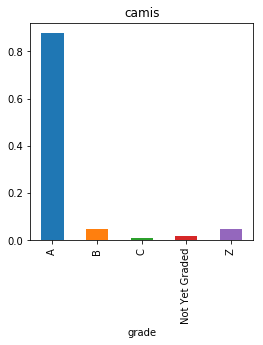

In [30]:
plot1df.plot(kind="pie", subplots = True, figsize=(4,4))

In [12]:
def assign_grade(x):
    if int(x) < 14:
        grade = "A"
    elif int(x) < 28:
        grade = "B"
    else:
        grade = "C"
    return grade

In [13]:
#Create Synthetic Grade
df_restaurant2 = df.drop_duplicates("camis")
df_restaurant2 = df_restaurant2[df_restaurant2["score"].notnull()]
df_restaurant2["synthetic_grade"] = df_restaurant2["score"].apply(lambda x: assign_grade(x))


In [15]:
plot2df = df_restaurant2.groupby("synthetic_grade")["camis"].count() / df_restaurant2.groupby("synthetic_grade")["camis"].count().sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000030A87470>,
      dtype=object)

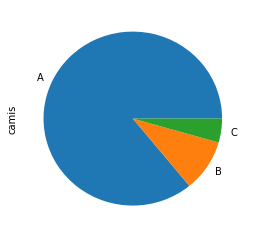

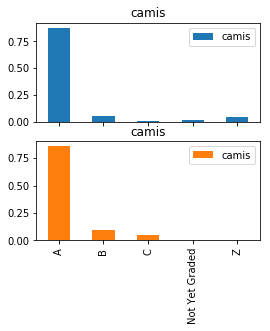

In [36]:
plot2df.plot(kind="pie", subplots = True, figsize=(4,4))
both = pd.concat([plot1df,plot2df],axis=1)
both.plot(kind="bar", subplots = True, figsize=(4,4))

In [ ]:
#How much does the score vary?
df2 = df[df["score"].notnull()]
df2["score"] = df2["score"].astype(int)
df2.groupby("camis")["score"].std()
df_test = df[df["camis"] == "40363834"]


In [ ]:
df_test